In [1]:
import pandas as pd

## Исследуем CTR в репосты и лайки в зависимости от тональности поста

In [52]:
df = pd.read_csv('data/posts.csv')

In [29]:
df.head()

,Unnamed: 0,text,tone,topic,group_id,comments_cnt:,likes_cnt,reposts_cnt,from_id,post_id,views_cnt,bdate,sex
0,901,"Снова ушла в грусть. Может, Артём и прав. Лучш...",negative,depression,180719396,5,3,0,449884850,191038,1,2.8.2000,1
1,908,"Хочу поделиться, больше никогда не буду пользо...",negative,depression,180719396,7,5,0,803086736,190911,1,30.1.1999,2
2,992,"Всем привет, я думаю удалить все соц сети, всё...",negative,depression,180719396,6,10,0,803086736,189882,1,30.1.1999,2
3,909,Апооооооссууууууууум,negative,depression,180719396,0,2,0,458780080,190904,1,6.6.1998,2
4,956,Доброго времени суток!\nМеня беспокоит такая п...,negative,depression,180719396,9,1,0,458780080,190315,1,6.6.1998,2


In [4]:
df = df[df['views_cnt'] > 1]

In [5]:
df['likes_ctr'] = df['likes_cnt'] / df['views_cnt']
df['reposts_ctr'] = df['reposts_cnt'] / df['views_cnt']

In [7]:
# mean likes ctr in positive and negative posts
ctr_data = df.groupby('tone').aggregate({'likes_ctr': 'mean', 'reposts_ctr': 'mean'})

In [8]:
ctr_data

,likes_ctr,reposts_ctr
tone,,
negative,0.034030,0.002114
positive,0.019126,0.001666


In [9]:
ctr_data.to_csv('results/ctr_data.csv')

In [10]:
# test hypothesis that ctr is the same in positive and negative posts
from scipy.stats import ttest_ind

likes_ctr_pos = df[df['tone'] == 'positive']['likes_ctr']
likes_ctr_neg = df[df['tone'] == 'negative']['likes_ctr']

ttest_ind(likes_ctr_pos, likes_ctr_neg)

TtestResult(statistic=-7.5433311367445475, pvalue=7.532595569288191e-14, df=1647.0)

In [11]:
# test hypothesis that ctr is the same in positive and negative posts

reposts_ctr_pos = df[df['tone'] == 'positive']['reposts_ctr']
reposts_ctr_neg = df[df['tone'] == 'negative']['reposts_ctr']

ttest_ind(reposts_ctr_pos, reposts_ctr_neg)

TtestResult(statistic=-3.984262221877244, pvalue=7.064326607636651e-05, df=1647.0)

## Исследуем текст постов

In [14]:
positive_posts = df[df['tone'] == 'positive']['text']
negative_posts = df[df['tone'] == 'negative']['text']

# percent of NaNs

pos_nans = positive_posts.isna().sum() / len(positive_posts)
neg_nans = negative_posts.isna().sum() / len(negative_posts)

In [15]:
pos_nans, neg_nans

(0.21245828698553948, 0.44666666666666666)

In [16]:
positive_posts = positive_posts.dropna()
negative_posts = negative_posts.dropna()

In [17]:
# analyze most common words and phrases in positive and negative posts

def get_most_common_words(posts, n=100):
    words = []
    for post in posts:
        words += post.split()
    return pd.Series(words).value_counts()[:n]

In [18]:
pos_words = get_most_common_words(positive_posts)
neg_words = get_most_common_words(negative_posts)
pos_words

—          499
в          459
и          376
на         178
-          139
          ... 
уже         13
ли          13
Он          13
который     12
были        12
Name: count, Length: 100, dtype: int64

In [48]:
import json

with open('data/comments.json', 'r') as f:
    comments = json.loads(f.read())

In [49]:
comments = pd.json_normalize(comments)

In [50]:
comments.shape

(14007, 18)

In [60]:
comments = comments.merge(users_df, on='from_id', how='inner')

In [61]:
comments.head()

,id,from_id,date,text,post_id,owner_id,parents_stack,thread.count,thread.items,thread.can_post,thread.show_reply_button,thread.groups_can_post,thread.next_from,attachments,attachments_meta.primary_mode,deleted,is_from_post_author,is_negative,bdate,sex
0,1401322,414004816,1705452137,Скиньте мне инструкцию. Не могу ответить ником...,1401319.0,-151060688.0,[],0,[],True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,23.3.1999,2
1,1401327,134843081,1705464956,Гениально!,1401319.0,-151060688.0,[],0,[],True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,5.3.1991,2
2,1401259,155433074,1705400850,"Ну тут скорее: ""Он сам все сделает, а я пока ф...",1401214.0,-151060688.0,[],0,[],True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,11.8.1999,2
3,1400984,155433074,1705213199,"Главное: Показать сопернику, что ты настроен с...",1400980.0,-151060688.0,[],0,[],True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,11.8.1999,2
4,1401209,23518959,1705351842,"Жалко тех, кто верит в это.",1401190.0,-151060688.0,[],1,[],True,True,True,next/0//0,NaN,NaN,NaN,NaN,NaN,11.4.1989,2


In [65]:
df

,Unnamed: 0,text,tone,topic,group_id,comments_cnt:,likes_cnt,reposts_cnt,from_id,post_id,views_cnt
0,0,Верил в него до конца,positive,science,151060688,0,11,7,-151060688,1401332,1733
1,1,NaN,positive,science,151060688,2,6,22,-151060688,1401328,2783
2,2,NaN,positive,science,151060688,0,0,0,-151060688,1401324,3035
3,3,NaN,positive,science,151060688,6,60,9,-151060688,1401319,6979
4,4,NaN,positive,science,151060688,1,12,1,-151060688,1401316,3097
...,...,...,...,...,...,...,...,...,...,...,...
1743,1743,"Норильский очевидец спас мужика, который напал...",negative,trash,170218556,125,517,103,-170218556,2322968,203545
1744,1744,Один удар и ты пропал.\n\nЖенщина одним ударом...,negative,trash,170218556,9,74,78,-170218556,2322544,68703
1745,1745,Всю кровать кровью залил.\n\nМуж Екатерины Вол...,negative,trash,170218556,76,222,25,-170218556,2322269,162040
1746,1746,Девушка нашла способ как можно ограбление оста...,negative,trash,170218556,45,587,317,-170218556,2322046,163855


In [67]:
comments.merge(df.drop_duplicates(subset=['post_id'])[['topic', 'tone', 'group_id', 'post_id']], on='post_id', how='inner').to_csv('results/comments_enriched.csv', index=False)

In [68]:
comments = pd.read_csv('results/comments_enriched.csv')

In [69]:
comments

,id,from_id,date,text,post_id,owner_id,parents_stack,thread.count,thread.items,thread.can_post,...,attachments,attachments_meta.primary_mode,deleted,is_from_post_author,is_negative,bdate,sex,topic,tone,group_id
0,1401322,414004816,1705452137,Скиньте мне инструкцию. Не могу ответить ником...,1401319.0,-151060688.0,[],0,[],True,...,NaN,NaN,NaN,NaN,NaN,23.3.1999,2,science,positive,151060688
1,1401327,134843081,1705464956,Гениально!,1401319.0,-151060688.0,[],0,[],True,...,NaN,NaN,NaN,NaN,NaN,5.3.1991,2,science,positive,151060688
2,1401259,155433074,1705400850,"Ну тут скорее: ""Он сам все сделает, а я пока ф...",1401214.0,-151060688.0,[],0,[],True,...,NaN,NaN,NaN,NaN,NaN,11.8.1999,2,science,positive,151060688
3,1400984,155433074,1705213199,"Главное: Показать сопернику, что ты настроен с...",1400980.0,-151060688.0,[],0,[],True,...,NaN,NaN,NaN,NaN,NaN,11.8.1999,2,science,positive,151060688
4,1401134,783609516,1705309381,Новый вид единоборств 😁,1400980.0,-151060688.0,[],0,[],True,...,NaN,NaN,NaN,NaN,NaN,3.9.1995,2,science,positive,151060688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2691,2322056,197839453,1702539416,Жопа как у лошади,2322046.0,-170218556.0,[],12,[],True,...,NaN,NaN,NaN,NaN,NaN,10.6.1996,1,trash,negative,170218556
2692,2322063,57176096,1702540111,🤣🤣🤣🤣🤣,2322046.0,-170218556.0,[],0,[],True,...,NaN,NaN,NaN,NaN,NaN,27.2.1991,2,trash,negative,170218556
2693,2322064,702761779,1702540138,Любовь победит ЗЛО👍,2322046.0,-170218556.0,[],0,[],True,...,NaN,NaN,NaN,NaN,NaN,19.5.1988,2,trash,negative,170218556
2694,2322241,452375868,1702559774,Премию!,2322046.0,-170218556.0,[],0,[],True,...,NaN,NaN,NaN,NaN,NaN,13.2.2001,1,trash,negative,170218556


In [122]:
comments[comments['tone'] == 'positive'].shape

(1054, 24)

In [123]:
comments[comments['tone'] == 'negative'].shape


(1636, 24)

## Исследуем комментарии

In [75]:
comments['age'] = ((pd.to_datetime(comments['date'], unit='s') - pd.to_datetime(comments['bdate'])).dt.days / 365).apply(lambda x: round(x))

/tmp/ipykernel_6112/3488580059.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  comments['age'] = ((pd.to_datetime(comments['date'], unit='s') - pd.to_datetime(comments['bdate'])).dt.days / 365).apply(lambda x: round(x))


In [79]:
# only age >= 18

comments = comments[comments['age'] >= 18]

/tmp/ipykernel_6112/1397629192.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Позитивная', 'Негативная'])


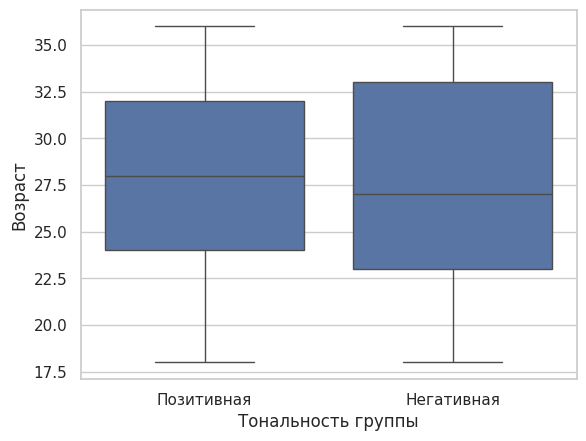

In [92]:
# distribution of age in positive and negative groups using seaborn with numeric labels on picture

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

ax = sns.boxplot(x="tone", y="age", data=comments)
ax.set(xlabel='Тональность группы', ylabel='Возраст')
ax.set_xticklabels(['Позитивная', 'Негативная'])
plt.savefig('results/age.png')

# данные на рисунке

In [93]:
# средний возраст в группах

comments.groupby('tone').aggregate({'age': 'mean'})

,age
tone,
negative,27.444377
positive,27.598672


In [94]:
# разброс возраста в группах

comments.groupby('tone').aggregate({'age': 'std'})

,age
tone,
negative,5.596413
positive,4.848046


In [ ]:

plt.xlabel('Тональность группы')
plt.ylabel('Возраст')

plt.savefig('results/age.png')

In [88]:
# percent of mails in positive and negative groups

positive_comments = comments[(comments['tone'] == 'positive') & (comments['sex'].isin([1, 2]))]
negative_comments = comments[(comments['tone'] == 'negative') & (comments['sex'].isin([1, 2]))]

print("Mans in positive: ", len(positive_comments[positive_comments['sex'] == 1])/len(positive_comments))

print("Mans in negative: ", len(negative_comments[negative_comments['sex'] == 1])/len(negative_comments))


Mans in positive:  0.1555977229601518
Mans in negative:  0.27383863080684595


## Анализ текста комментариев

In [95]:
positive_comments = comments[comments['tone'] == 'positive']['text'].dropna()
negative_comments = comments[comments['tone'] == 'negative']['text'].dropna()

In [107]:
# фильтруем союзы предлоги и тд, считаем частоту слов и фраз

import pymorphy2
import re

morph = pymorphy2.MorphAnalyzer()

def get_most_common_words(posts, n=1000):
    words = []
    for post in posts:
        words += [morph.parse("".join(filter(lambda x: x.isalpha(), word)))[0].normal_form for word in post.split() if len(word) > 3]
    return pd.Series(words).value_counts()[:n]

pos_words = get_most_common_words(positive_comments)

In [119]:
pos_words.to_csv('results/pos_words.csv')

In [120]:
neg_words = get_most_common_words(negative_comments)

In [121]:
neg_words.to_csv('results/neg_words.csv')

In [125]:
comments[['text', 'bdate', 'sex', 'topic', 'tone', 'age']].head().to_csv('results/comments_enriched_head.csv', index=False)

In [126]:
comments.to_csv('results/comments_enriched.csv', index=False)

,id,from_id,date,text,post_id,owner_id,parents_stack,thread.count,thread.items,thread.can_post,...,attachments_meta.primary_mode,deleted,is_from_post_author,is_negative,bdate,sex,topic,tone,group_id,age
0,1401322,414004816,1705452137,Скиньте мне инструкцию. Не могу ответить ником...,1401319.0,-151060688.0,[],0,[],True,...,NaN,NaN,NaN,NaN,23.3.1999,2,science,positive,151060688,25
1,1401327,134843081,1705464956,Гениально!,1401319.0,-151060688.0,[],0,[],True,...,NaN,NaN,NaN,NaN,5.3.1991,2,science,positive,151060688,33
2,1401259,155433074,1705400850,"Ну тут скорее: ""Он сам все сделает, а я пока ф...",1401214.0,-151060688.0,[],0,[],True,...,NaN,NaN,NaN,NaN,11.8.1999,2,science,positive,151060688,24
3,1400984,155433074,1705213199,"Главное: Показать сопернику, что ты настроен с...",1400980.0,-151060688.0,[],0,[],True,...,NaN,NaN,NaN,NaN,11.8.1999,2,science,positive,151060688,24
4,1401134,783609516,1705309381,Новый вид единоборств 😁,1400980.0,-151060688.0,[],0,[],True,...,NaN,NaN,NaN,NaN,3.9.1995,2,science,positive,151060688,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2691,2322056,197839453,1702539416,Жопа как у лошади,2322046.0,-170218556.0,[],12,[],True,...,NaN,NaN,NaN,NaN,10.6.1996,1,trash,negative,170218556,28
2692,2322063,57176096,1702540111,🤣🤣🤣🤣🤣,2322046.0,-170218556.0,[],0,[],True,...,NaN,NaN,NaN,NaN,27.2.1991,2,trash,negative,170218556,33
2693,2322064,702761779,1702540138,Любовь победит ЗЛО👍,2322046.0,-170218556.0,[],0,[],True,...,NaN,NaN,NaN,NaN,19.5.1988,2,trash,negative,170218556,36
2694,2322241,452375868,1702559774,Премию!,2322046.0,-170218556.0,[],0,[],True,...,NaN,NaN,NaN,NaN,13.2.2001,1,trash,negative,170218556,23
